# Zad 2
Strona https://open-meteo.com udostępnia API pozwalające pobierać historyczne dane pogodowe. Znajdź na stronie dokumentację API, a następnie:

* Stwórz procedurę, która otrzyma współrzędne geograficzne (latitude, longitude) i zakres dat, a następnie pobierze dane pogodowe z API.

* Umieść pobrane dane w `DataFrame`. Upewnij się, że wszystkie kolumny mają odpowiednie nazwy i typ danych. Ustaw daty jako indeks.

* Opcjonalnie: wykorzystaj Geocoding API (np. https://nominatim.org/ udostępniany przez OpenStreetMap), aby automatycznie pobrać współrzędne geograficzne dla podanej lokalizacji.

In [86]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
def get_weather_data(city, start_date, end_date):

    headers = {
        'User-Agent': 's24353@pjwstk.edu.pl'
    }

    req = requests.get(f"https://nominatim.openstreetmap.org/search?q={city}&format=json", headers=headers)

    data = req.json()

    lat = data[0]['lat']
    lon = data[0]['lon']

    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&daily=temperature_2m_max,temperature_2m_min,sunrise,sunset,rain_sum&timezone=Europe%2FBerlin&start_date={start_date}&end_date={end_date}"

    r = requests.get(url)

    data = r.json()
    print(json.dumps(data, indent=4, sort_keys=False))

    return r

api_call = get_weather_data("Warszawa", "2025-01-01", "2025-03-12")

{
    "latitude": 52.231937,
    "longitude": 21.082565,
    "generationtime_ms": 0.1652240753173828,
    "utc_offset_seconds": 3600,
    "timezone": "Europe/Berlin",
    "timezone_abbreviation": "GMT+1",
    "elevation": 82.0,
    "daily_units": {
        "time": "iso8601",
        "temperature_2m_max": "\u00b0C",
        "temperature_2m_min": "\u00b0C",
        "sunrise": "iso8601",
        "sunset": "iso8601",
        "rain_sum": "mm"
    },
    "daily": {
        "time": [
            "2025-01-01",
            "2025-01-02",
            "2025-01-03",
            "2025-01-04",
            "2025-01-05",
            "2025-01-06",
            "2025-01-07",
            "2025-01-08",
            "2025-01-09",
            "2025-01-10",
            "2025-01-11",
            "2025-01-12",
            "2025-01-13",
            "2025-01-14",
            "2025-01-15",
            "2025-01-16",
            "2025-01-17",
            "2025-01-18",
            "2025-01-19",
            "2025-01-20"

In [88]:
df = pd.DataFrame(api_call.json()['daily'])

df.rename(columns={'time':'date', 'temperature_2m_max':'max_temp', 'temperature_2m_min':'min_temp'}, inplace=True)

df['sunrise'] = df['sunrise'].str.split("T").str[1]
df['sunset'] = df['sunset'].str.split("T").str[1]

df.set_index('date', inplace=True)

df.sort_index(inplace=True)
df

,max_temp,min_temp,sunrise,sunset,rain_sum
date,,,,,
2025-01-01,5.5,1.3,07:44,15:33,0.0
2025-01-02,6.6,0.8,07:44,15:34,4.4
2025-01-03,2.3,0.0,07:44,15:36,2.2
2025-01-04,-0.0,-3.4,07:44,15:37,0.0
2025-01-05,-0.4,-3.8,07:43,15:38,0.0
...,...,...,...,...,...
2025-03-08,17.5,4.2,06:05,17:27,0.0
2025-03-09,15.1,5.5,06:03,17:29,0.0
2025-03-10,18.8,7.2,06:00,17:31,0.0


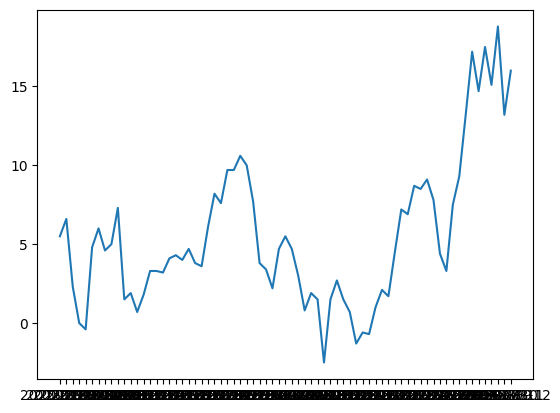

In [89]:
plt.plot(df.index, df.max_temp)

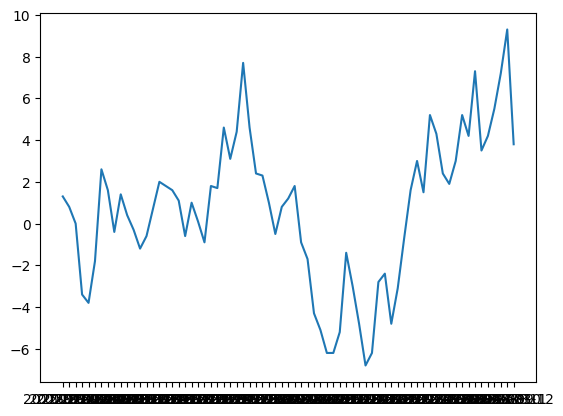

In [90]:
plt.plot(df.index, df.min_temp)

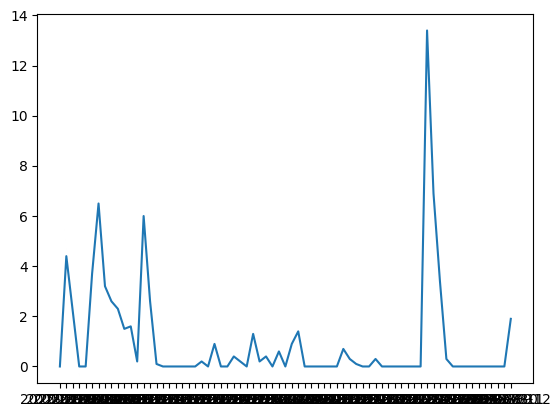

In [91]:
plt.plot(df.index, df.rain_sum)